<a href="https://colab.research.google.com/github/saeed2016/Analyze_SalesData/blob/master/SIT719_Prac05_Task02_HD_220561372.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 1: DECLARE THE MODULES

In [ ]:
## Saeed Azad 220561372

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [ ]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

In [ ]:
DataSet

'training_attack_types (1).txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'apache2': 'dos',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'httptunnel': 'u2r',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'mailbomb': 'dos',
 'mscan': 'probe',
 'multihop': 'r2l',
 'named': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'normal': 'benign',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'processtable': 'dos',
 'ps': 'u2r',
 'rootkit': 'u2r',
 'saint': 'probe',
 'satan': 'probe',
 'sendmail': 'r2l',
 'smurf': 'dos',
 'snmpgetattack': 'dos',
 'snmpguess': 'r2l',
 'spy': 'r2l',
 'sqlattack': 'u2r',
 'teardrop': 'dos',
 'udpstorm': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'worm': 'probe',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'xterm': 'u2r'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

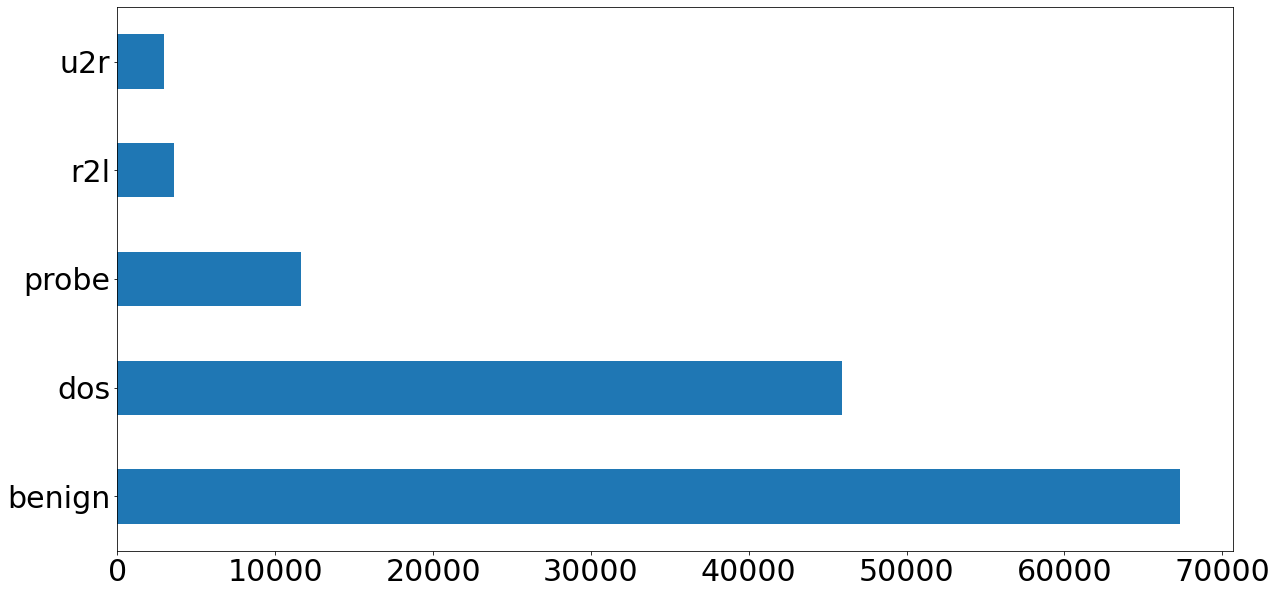

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)
 

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [ ]:
## length of Train and Test Datasets  they have 42 attributes(features)
train_df.shape, test_df.shape

((125973, 42), (22544, 42))

In [ ]:
train_df['attack_category'].unique()

array(['benign', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [ ]:
df_dos = train_df.loc[train_df['attack_category']=='dos']
df_benign = train_df.loc[train_df['attack_category']=='benign']
df_r2l = train_df.loc[train_df['attack_category']=='r2l']
df_u2r = train_df.loc[train_df['attack_category']=='u2r']
df_probe = train_df.loc[train_df['attack_category']=='probe']
df_dos.shape
df_benign.shape
df_probe.shape
df_u2r.shape
df_r2l.shape

(995, 42)

In [ ]:
# I reckon we faced with imbalanced dataset so the model prediction is not good for the attack  types (u2r and r2l)
df_u2r = test_df.loc[test_df['attack_category']=='u2r']
df_u2r.shape
df_u2r = test_df.loc[test_df['attack_category']=='dos']
df_u2r.shape

(7636, 42)

In [ ]:
# identify the attribute names(Header)
train_df.columns.values.tolist()
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type',
       'attack_category'],
      dtype='object')

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score
from sklearn import metrics


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_RanForest = RandomForestClassifier()

In [ ]:
clf_RanForest.fit(train_x,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_RanForest = clf_RanForest.predict(test_x)

In [ ]:
cm_RanForest = confusion_matrix(test_Y,pred_RanForest)
print(results)


[[9456   67  186    0    2]
 [1887 5691   58    0    0]
 [ 796  163 1464    0    0]
 [2448    0    2  122    2]
 [ 189    0    3    3    5]]


In [ ]:
print("{:.2%}".format(accuracy_score(test_Y,pred_RanForest)))

74.25%


In [ ]:
precision_RanForest = precision_score(test_Y,pred_RanForest,average=None)
for value in precision_RanForest:
  print("{:.2%}".format(value))




64.00%
96.12%
85.46%
97.60%
55.56%


In [ ]:
precision_RanForest_weight = precision_score(test_Y,pred_RanForest,average='weighted')
print("{:.2%}".format(precision_RanForest_weight))

80.94%


In [ ]:
recall_RanForest_weight = recall_score(test_Y,pred_RanForest,average='weighted')
print("{:.2%}".format(recall_RanForest_weight))

74.25%


In [ ]:
fscore_RanForest_weight = f1_score(test_Y,pred_RanForest,average='weighted')
print("{:.2%}".format(fscore_RanForest_weight))

70.39%


In [ ]:
recall_RanForest = recall_score(test_Y,pred_RanForest,average=None)
for value in recall_RanForest:
  print("{:.2%}".format(value))

97.37%
74.53%
60.42%
4.74%
2.50%


In [ ]:
cm = cm_RanForest.diagonal()/cm_RanForest.sum(axis=1)
for value in cm:
  print("{:.2%}".format(value))

97.37%
74.53%
60.42%
4.74%
2.50%


In [ ]:
## average = None , the scores for each class are returned.
fscore = f1_score(test_Y,pred_RanForest,average=None)
for value in fscore:
  print("{:.2%}".format(value))

77.23%
83.96%
70.79%
9.04%
4.78%


In [ ]:
from sklearn import svm 

In [ ]:
# I have tried the svm with two kernels , the model has slightly higher accuracy with poly kernel.

In [ ]:
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(train_x,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict_svm = clf_svm.predict(test_x)
cm_svm = confusion_matrix(test_Y,predict_svm)
print(cm_svm)

[[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]


In [ ]:
cm = cm_svm.diagonal()/cm_svm.sum(axis=1)
for value in cm:
  print("{:.2%}".format(value))

95.93%
74.49%
65.83%
9.67%
6.50%


In [ ]:
accuracy_svm = accuracy_score(test_Y,predict_svm)
print (accuracy_svm)

In [ ]:
clf_svm= svm.SVC(kernel='poly')
clf_svm.fit(train_x,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict_svm = clf_svm.predict(test_x)
cm_svm = confusion_matrix(test_Y,predict_svm)
print(cm_svm)

[[9316   58  336    1    0]
 [1921 5688   27    0    0]
 [ 658  170 1595    0    0]
 [2320    0    4  249    1]
 [ 175    2    2    8   13]]


In [ ]:
recall_svm_weight = recall_score(test_Y,predict_svm,average='weighted')
print("{:.2%}".format(recall_svm_weight))

74.79%


In [ ]:
precision_svm_weight = precision_score(test_Y,predict_svm,average='weighted')
print("{:.2%}".format(precision_svm_weight))

81.01%


In [ ]:
fscore_svm_weight = f1_score(test_Y,predict_svm,average='weighted')
print("{:.2%}".format(fscore_svm_weight))

71.66%


In [ ]:
cm = cm_svm.diagonal()/cm_svm.sum(axis=1)
for value in cm:
  print("{:.2%}".format(value))


95.93%
74.49%
65.83%
9.67%
6.50%


In [ ]:
accuracy_svm = accuracy_score(test_Y,predict_svm)
print (accuracy_svm)

0.7479151880766501


In [ ]:
## we get slightly better accuracy by  initialize kernel to 'poly' compared with the default kernel which is 'rbf'

In [ ]:
precision_svm = precision_score(test_Y,predict_svm,average=None)
for value in precision_svm:
  print("{:.2%}".format(value))

64.74%
96.11%
81.21%
96.51%
92.86%


In [ ]:
recall_svm = recall_score(test_Y,predict_svm,average=None)
for value in recall_svm:
  print("{:.2%}".format(value))

95.93%
74.49%
65.83%
9.67%
6.50%


In [ ]:
fscore_svm = f1_score(test_Y,predict_svm,average=None)
for value in fscore_svm:
  print("{:.2%}".format(value))

77.31%
83.93%
72.71%
17.58%
12.15%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_AdaBoost = AdaBoostClassifier(n_estimators=100,random_state=0).fit(train_x,train_Y)

In [ ]:
predicted_Adaboost = clf_AdaBoost.predict(test_x)
cm_adaboost = confusion_matrix(test_Y,predicted_Adaboost)
print(cm_adaboost)

[[7878 1382   94    5  352]
 [1692 4586 1350    0    8]
 [ 174  532 1714    0    3]
 [2203  328   27   13    3]
 [  90    0  100    5    5]]


In [ ]:
cm = cm_adaboost.diagonal()/cm_adaboost.sum(axis=1)
for value in cm:
   print("{:.2%}".format(value))

81.12%
60.06%
70.74%
0.51%
2.50%


In [ ]:
accuracy_Adaboost = accuracy_score(test_Y,predicted_Adaboost)
accuracy_Adaboost

In [ ]:
fscore_adaboost_weight = f1_score(test_Y,predicted_Adaboost,average='weighted')
print("{:.2%}".format(fscore_adaboost_weight))

59.27%


In [ ]:
recall_adaboost_weight = recall_score(test_Y,predicted_Adaboost,average='weighted')
print("{:.2%}".format(recall_adaboost_weight))

62.97%


In [ ]:
precision_adaboost_weight = precision_score(test_Y,predicted_Adaboost,average='weighted')
print("{:.2%}".format(precision_adaboost_weight))

63.02%


In [ ]:
precision_adaBoost = precision_score(test_Y,predicted_Adaboost,average=None)
for value in precision_adaBoost:
  print("{:.2%}".format(value))

65.45%
67.16%
52.18%
56.52%
1.35%


In [ ]:
recall_adaBoost = recall_score(test_Y,predicted_Adaboost,average=None)
for value in recall_adaBoost:
  print("{:.2%}".format(value))

81.12%
60.06%
70.74%
0.51%
2.50%


In [ ]:
fscore_adaBoost = f1_score(test_Y,predicted_Adaboost,average=None)
for value in fscore_adaBoost:
  print("{:.2%}".format(value))

72.45%
63.41%
60.06%
1.00%
1.75%


In [ ]:
# I noticed, Initializing n_estimator to 100 is a good way to tune the model. the default is 50.

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression().fit(train_x,train_Y)


In [ ]:
predicted_LR = clf_LR.predict(test_x)
cm_LR = confusion_matrix(test_Y,predicted_LR)
print(cm_LR)

[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]


In [ ]:
precision_LR_weight = precision_score(test_Y,predicted_LR,average='weighted')
print("{:.2%}".format(precision_LR_weight))

80.09%


In [ ]:
recall_LR_weight = recall_score(test_Y,predicted_LR,average='weighted')
print("{:.2%}".format(recall_LR_weight))

75.31%


In [ ]:
fscore_LR_weight = f1_score(test_Y,predicted_LR,average='weighted')
print("{:.2%}".format(fscore_LR_weight))

71.54%


In [ ]:
cm = cm_LR.diagonal()/cm_LR.sum(axis=1)
for value in cm:
  print("{:.2%}".format(value))

92.61%
79.26%
75.32%
3.85%
4.00%


In [ ]:
accuracy_LR = accuracy_score(test_Y,predicted_LR)
accuracy_LR

0.7530606813342796

In [ ]:
precision_LR = precision_score(test_Y,predicted_LR,average=None)
for value in precision_LR:
  print("{:.2%}".format(value))
  


65.62%
96.89%
73.74%
90.83%
80.00%


In [ ]:
precision_LR_weighted = precision_score(test_Y,predicted_LR,average='weighted')
precision_LR_weighted

In [ ]:
recall_LR = recall_score(test_Y,predicted_LR,average=None)
for value in recall_LR:
  print("{:.2%}".format(value))

92.61%
79.26%
75.32%
3.85%
4.00%


In [ ]:
recall_LR_weighted = recall_score(test_Y,predicted_LR,average='weighted')
recall_LR_weighted

In [ ]:
fscore_LR = f1_score(test_Y,predicted_LR,average=None)
for value in fscore_LR:
  print("{:.2%}".format(value))

76.81%
87.19%
74.52%
7.38%
7.62%


In [ ]:
fscore_LR_weighted = f1_score(test_Y,predicted_LR,average='weighted')
fscore_LR_weighted

In [ ]:
# I have initialized the n_neighbors with 3 and 6, but  it seems the default which is 5 is the best option.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5).fit(train_x,train_Y)

In [ ]:
predicted_KNN = clf_knn.predict(test_x)
cm_knn = confusion_matrix(test_Y,predicted_KNN)

In [ ]:
cm = cm_knn.diagonal()/cm_knn.sum(axis=1)
for value in cm:
  print("{:.2%}".format(value))

97.25%
77.59%
67.23%
6.60%
4.50%


In [ ]:
fscore_KNN_weight = f1_score(test_Y,predicted_KNN,average='weighted')
print("{:.2%}".format(fscore_KNN_weight))

72.54%


In [ ]:
precision_KNN_weight = precision_score(test_Y,predicted_KNN,average='weighted')
print("{:.2%}".format(precision_KNN_weight))

81.69%


In [ ]:
recall_KNN_weight = recall_score(test_Y,predicted_KNN,average='weighted')
print("{:.2%}".format(recall_KNN_weight))

76.19%


In [ ]:
accuracy_KNN = accuracy_score(test_Y,predicted_KNN)
accuracy_KNN

0.7619322214336409

In [ ]:
precision_KNN = precision_score(test_Y,predicted_KNN,average=None)
for value in precision_KNN:
  print("{:.2%}".format(value))

66.41%
96.17%
82.52%
94.97%
90.00%


In [ ]:
recall_KNN = recall_score(test_Y,predicted_KNN,average=None)
for value in recall_KNN:
  print("{:.2%}".format(value))

97.25%
77.59%
67.23%
6.60%
4.50%


In [ ]:
fscore_KNN = f1_score(test_Y,predicted_KNN,average=None)
for value in fscore_KNN:
  print("{:.2%}".format(value))

78.93%
85.89%
74.10%
12.35%
8.57%


In [ ]:
x_values = ['RandomForest','SVM','AdaBoost','LogisticRegressio','KNN']
accuracy_values = [accuracy_RanForest,accuracy_svm,accuracy_Adaboost,accuracy_LR,accuracy_KNN]
plt.yticks(np.arange(0,1,0.080))
plt.xticks(rotation=90)
plt.bar(x_values,accuracy_values)

NameError: ignored

In [ ]:
## as it is clear from the above plot, KNN has highest accuracy and AdaBoost the lowest.

In [ ]:
## how to plot confusion_Matrix

In [ ]:
train_Y.unique()

In [ ]:
attack_class = train_Y.unique()
attack_class.sort()
attack_class

array(['benign', 'dos', 'probe', 'r2l', 'u2r'], dtype=object)

In [ ]:
# plt.plot(attack_class,confusion_matrix(test_Y,predicted_LR))
# plt.yticks(np.arange(0,10000,1000))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

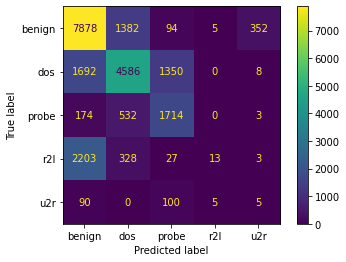

In [ ]:
## plotting confusion_matrix for AdaBoost
plot_confusion_matrix(clf_AdaBoost,test_x,test_Y,display_labels=attack_class,values_format='.0f',)

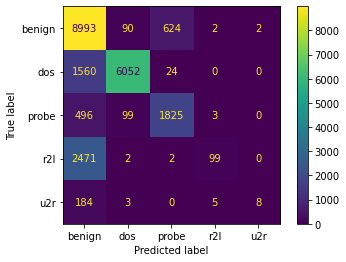

In [ ]:
# plotting confusion_matrix for Logistic Regression
plot_confusion_matrix(clf_LR,test_x,test_Y,display_labels=attack_class,values_format='.0f')

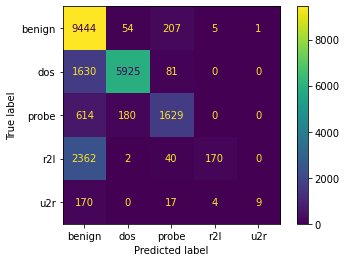

In [ ]:
# plotting confusion_matrix for KNN
plot_confusion_matrix(clf_knn,test_x,test_Y,display_labels=attack_class,values_format='.0f')

In [ ]:
# plotting confusion_matrix for svm
plot_confusion_matrix(clf_svm,test_x,test_Y,display_labels=attack_class,values_format='.0f')

In [ ]:
# ROC_Curve computes reciever operating characteristics. It can be only implemented on 
# the binary classification tasks. 

In [ ]:
## FPR (Fasle positive rate(alarm )) = False positives /(False positives + True Negatives)

In [ ]:
RanForest_Prob = clf_RanForest.predict_proba(test_x)

In [ ]:
RanForest_Prob = RanForest_Prob[:,1]

In [ ]:
fpr, tpr, thresholds= metrics.roc_curve(test_Y,RanForest_Prob,pos_label=5)
#fpr

In [ ]:
Knn_prob = clf_knn.predict_proba(test_x)

In [ ]:
Knn_prob = Knn_prob[0:1]

In [ ]:
#fpr, tpr, thresholds= metrics.roc_curve(test_Y,Knn_prob,pos_label=1)

In [ ]:
LR_Prob = clf_LR.predict_proba(test_x)

In [ ]:
LR_Prob = LR_Prob[:,1]

In [ ]:
fpr, tpr, thresholds= metrics.roc_curve(test_Y,LR_Prob,pos_label=5)


In [ ]:
Adaboost_Prob = clf_AdaBoost.predict_proba(test_x)

In [ ]:
Adaboost_Prob = Adaboost_Prob[:,1]

In [ ]:
fpr, tpr, thresholds= metrics.roc_curve(test_Y,Adaboost_Prob,pos_label=5)


In [ ]:
fpr, tpr, thresholds= metrics.roc_curve(test_Ylabel=5)


In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot(fpr,thresholds,linestyle = '--')